# MINI-PROJECT

# Dataset Top-View Vehicle Image Dataset and Manually Collected Data

## Overview
The Top-View Vehicle Image Dataset Classification dataset contains images of Top-View Vehicle intended for binary image classification tasks. The goal is to classify images based on Street View.

- **Dataset URL:** [Top-View Vehicle Detection Image Dataset](https://www.kaggle.com/datasets/farzadnekouei/top-view-vehicle-detection-image-dataset/data)
- **Dataset Size:** ~50 MB
- **Classes:** 2 (Traffic Jam, Empty Street)
- **Image Format:** JPEG

## Structure

### Folders
The dataset is organized into two main folders:

- `traindata/`:
  - `traindata/`: Contains the training images.
    - `Jam/`: Contains images of men.
    - `Empty/`: Contains images of women.

- `testdata/`:
  - `testdata/`: Contains the testing images.
    - `Jam/`: Contains images of men.
    - `Empty/`: Contains images of women.

### Example Files
Here are some example file names you might find in the dataset:

- `traindata/traindata/Jam/5_mp4-26_jpg.rf.61d8ef7774c6c33aa7015c91dc91aa34.jpg`
- `traindata/traindata/women/12_mp4-27_jpg.rf.2b272befa75f6ccd269223ccc84e5391.jpg`
- `testdata/testdata/men/10_mp4-31_jpg.rf.0daa09b648954e3a19824a49ad49876e.jpg`
- `testdata/testdata/women/7_mp4-16_jpg.rf.4adf9f6fc7b5f6571fd1ef429cd79026.jpg`

### Image Specifications
- **Resolution:** Varies
- **Color:** RGB

## Usage
This dataset is ideal for practicing binary image classification using Convolutional Neural Networks (CNNs). It can be used to train a model to distinguish between images of Jam and Empty Street.

## Step 1: Import Required Libraries
Begin by importing the necessary libraries.

In [43]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models, datasets
import cv2

## Step 3: Load and Preprocess Data and Data Augmentation
To prevent overfitting, augment your data using various transformations like rotation, zoom, flip, etc.

In [44]:


train_data = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_data = ImageDataGenerator(rescale=1./255,)

training_set = train_data.flow_from_directory(
        'train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_data.flow_from_directory(
        'valid',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


Found 653 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


## Step 3: Check label and one image
To prevent overfitting, augment your data using various transformations like rotation, zoom, flip, etc.

In [45]:
print(training_set.class_indices)
print(training_set.samples)

{'traffic': 0, 'untraffic': 1}
653


In [46]:
print(test_set.class_indices)


{'traffic': 0, 'untraffic': 1}


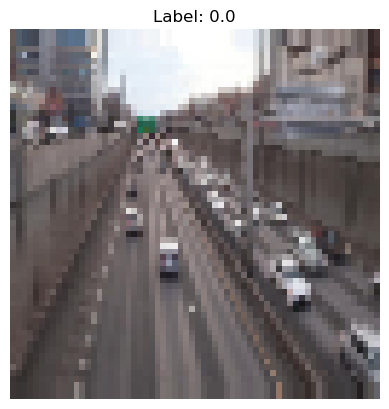

In [47]:
x_batch, y_batch = next(training_set)
image = x_batch[1]
label = y_batch[1]

plt.imshow(image)
plt.title(f'Label: {label}')
plt.axis('off')  
plt.show()

## Step 4: Build the CNN Model
Define the architecture of your CNN model. Start with convolutional layers followed by pooling layers, and end with fully connected layers.

In [48]:


model = models.Sequential([
                          layers.Conv2D(32, kernel_size=(3, 3), activation='relu',padding="same", input_shape=(64, 64,3)),
                          layers.Conv2D(64, kernel_size=(3, 3), activation='relu',padding="same"),
                          layers.MaxPool2D(2,2),
                          layers.Flatten(),
                          layers.Dense(128, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                          ])

# Compile the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 128)               8388736   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

## Step 5: Compile the Model
Compile your model by specifying the optimizer, loss function, and evaluation metrics.

In [49]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Step 6: Train the Model
Train your model using the training data and validate it using the validation data.

In [50]:

history=model.fit(
        training_set,
        epochs=10,
        batch_size=64,
        )

Epoch 1/10
21/21 [==============================] - 18s 807ms/step - loss: 0.9050 - accuracy: 0.6034
Epoch 2/10
21/21 [==============================] - 12s 566ms/step - loss: 0.2474 - accuracy: 0.8867
Epoch 3/10
21/21 [==============================] - 13s 630ms/step - loss: 0.1397 - accuracy: 0.9525
Epoch 4/10
21/21 [==============================] - 12s 606ms/step - loss: 0.0562 - accuracy: 0.9801
Epoch 5/10
21/21 [==============================] - 12s 579ms/step - loss: 0.2327 - accuracy: 0.9219
Epoch 6/10
21/21 [==============================] - 12s 566ms/step - loss: 0.0739 - accuracy: 0.9755
Epoch 7/10
21/21 [==============================] - 13s 644ms/step - loss: 0.0312 - accuracy: 0.9908
Epoch 8/10
21/21 [==============================] - 16s 762ms/step - loss: 0.0388 - accuracy: 0.9862
Epoch 9/10
21/21 [==============================] - 13s 615ms/step - loss: 0.0465 - accuracy: 0.9877
Epoch 10/10
21/21 [==============================] - 13s 617ms/step - loss: 0.0228 - accura

## Step 7: Evaluate the Model
Evaluate the performance of your model using the validation set.

In [51]:
model.evaluate(test_set)

3/3 [==============================] - 1s 203ms/step - loss: 0.5071 - accuracy: 0.8750


[0.5070961117744446, 0.875]

## Step 8: Save the Model
Finally, save your trained model for future use.

In [17]:
##model.save('Abd_cnn_model.h5')

c:\Users\modya\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
model=tf.keras.models.load_model("Abd_cnn_model.h5")

Actual Label:No_traffic
Predict Label:Traffic


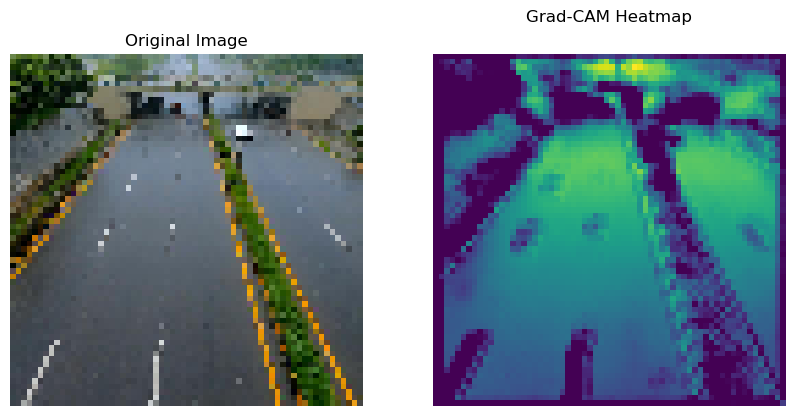

In [42]:
x_batch, y_batch = next(test_set)
k=np.random.randint(len(x_batch))
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

  
    grads = tape.gradient(class_channel, last_conv_layer_output)

  
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()



image = x_batch[k]
pred=model.predict(np.expand_dims(image,axis=0),verbose=3)[0][0]
print("Actual Label:"+str("Traffic" if y_batch[k] == 0 else "No_traffic"))
print("Predict Label:"+str("Traffic" if  pred >0.5  else "No_traffic"))


  
last_conv_layer_name = 'conv2d_15'  

heatmap = make_gradcam_heatmap(np.expand_dims(image,axis=0), model, last_conv_layer_name)


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].matshow(heatmap, cmap='viridis')
ax[1].set_title("Grad-CAM Heatmap")
ax[1].axis('off')

plt.show()